#Three Observations

-The correlation between mouse weight and tumor volume is high. This means that, as the weight of the mouse grows, so
does the average volume of their tumor.

-It takes roughly 20 days for Capomulin to have an effect and start shrinking a tumor's volume.

-Out of all the treatments, Capomulin and Ramicane work the best in reducing the size of tumors.

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
mouse_metadata['Mouse ID'].count()

249

In [7]:
duplicate_id = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [8]:
duplicate_df = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
mouse_study = mouse_study[mouse_study['Mouse ID'].isin(duplicate_id)==False]
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
len(mouse_study['Mouse ID'].unique())

248

In [11]:
drug_regimen = mouse_study.groupby("Drug Regimen")

t_mean = drug_regimen["Tumor Volume (mm3)"].mean()
t_median = drug_regimen["Tumor Volume (mm3)"].median()
t_variance = drug_regimen["Tumor Volume (mm3)"].var()
t_std = drug_regimen["Tumor Volume (mm3)"].std()
t_sem = drug_regimen["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame([t_mean, t_median, t_variance, t_std, t_sem]).T
drug_summary.columns = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance", 
                        "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
    

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
drug_summary2 = mouse_study[[
    "Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])
drug_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
drug_count = mouse_study["Drug Regimen"].value_counts()
drug_count


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

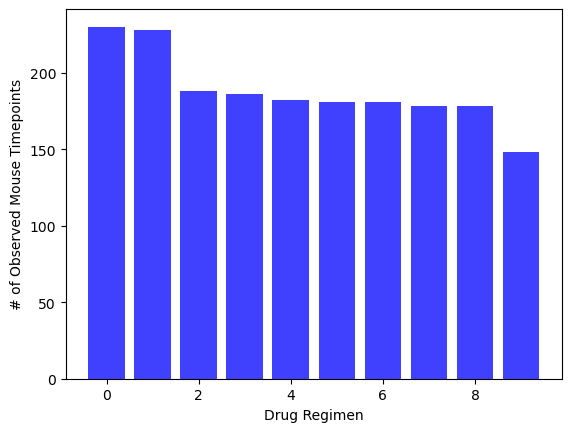

In [14]:
x_axis= np.arange(len(drug_count))
y_axis= drug_count

plt.bar(x_axis, y_axis, color='b', alpha=0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

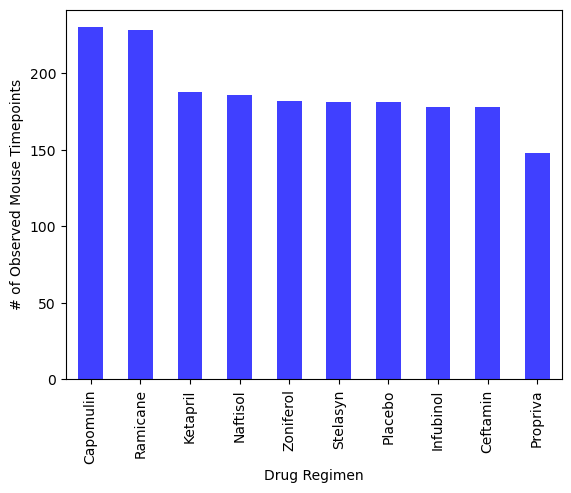

In [15]:
drug_count.plot(kind="bar", color='b', alpha=0.75)
plt.ylabel("# of Observed Mouse Timepoints")

In [16]:
gender_count = mouse_study["Sex"].value_counts()
gender_count

Sex
Male      958
Female    922
Name: count, dtype: int64

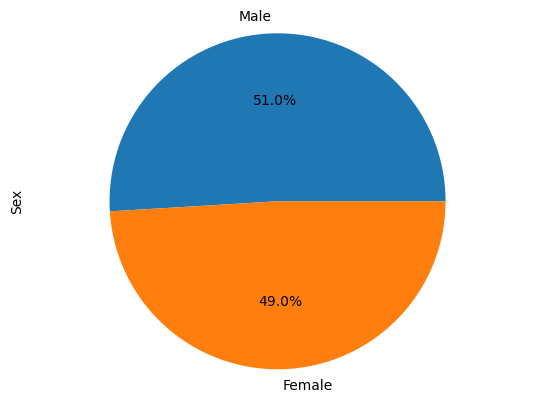

In [17]:
labels=["Male","Female"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

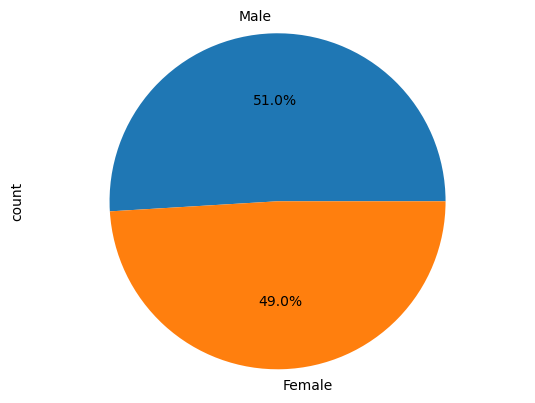

In [18]:
gender_count.plot(kind="pie", y='Sex', autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [43]:
greatest_tp = mouse_study.groupby("Mouse ID")
greatest_tp = greatest_tp["Timepoint"].max()

greatest_tp_df = pd.DataFrame(greatest_tp)

tumor_volume = pd.merge(greatest_tp_df, mouse_study, on = ["Mouse ID", "Timepoint"])
tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [41]:
treatments = ["Campomulin","Ceftamin","Infubinol", "Ramicane"]

volume_data = []

for treatment in treatments:
    volume = tumor_volume.loc[tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    volume_data.append(volume)
    
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    
    print(f"{treatment}'s numbers: {lowerq} {upperq} {iqr} {lower_bound} {upper_bound}")




Campomulin's numbers: nan nan nan nan nan
Ceftamin's numbers: 48.72207785 64.29983003 15.577752179999997 25.355449580000002 87.66645829999999
Infubinol's numbers: 54.04860769 65.52574285 11.477135160000003 36.83290494999999 82.74144559000001
Ramicane's numbers: 31.56046955 40.65900627 9.098536719999998 17.912664470000003 54.30681135


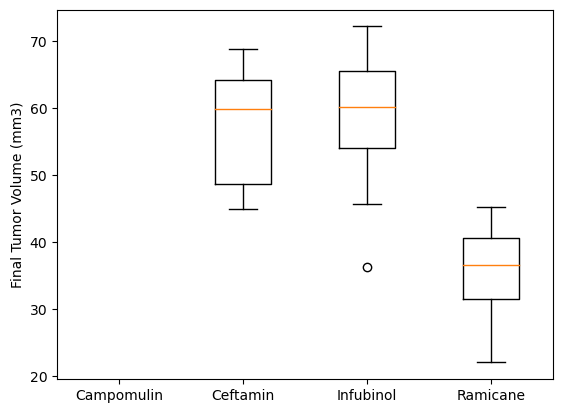

In [40]:
plt.boxplot(volume_data, labels = treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

#not sure why campomulin won't graph

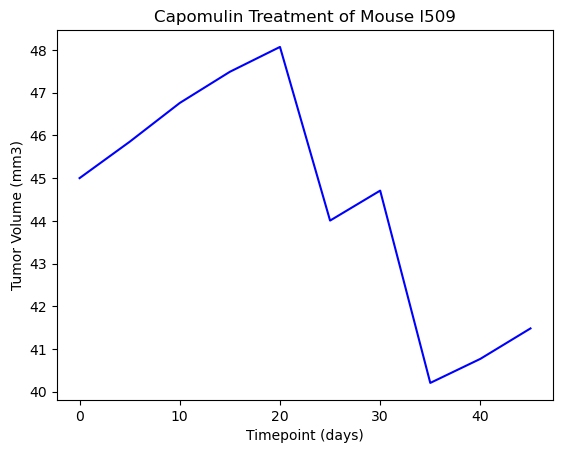

In [61]:
one_mouse = mouse_study.loc[mouse_study["Mouse ID"] == "l509"]

plt.plot(one_mouse["Timepoint"],one_mouse["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

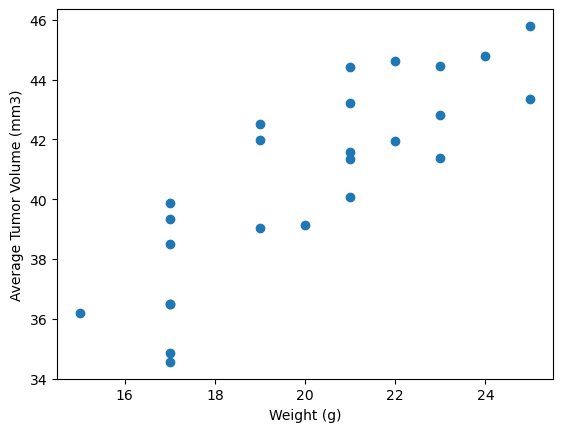

In [65]:
capomulin = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
avg_tumor = capomulin["Tumor Volume (mm3)"].mean()
weight = capomulin["Weight (g)"].unique()
plt.scatter(weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor is PearsonRResult(statistic=array([0.84116671]), pvalue=array([1.39298626e-07]))


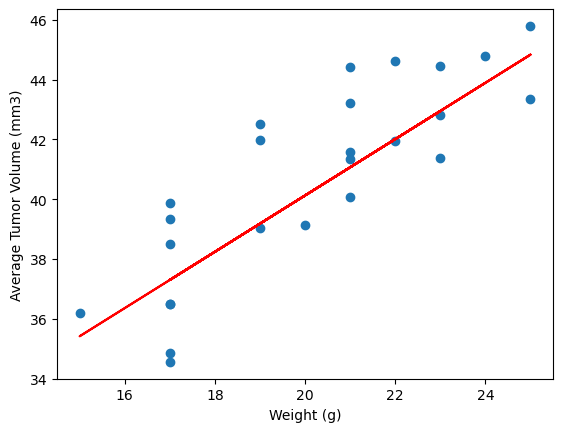

In [95]:
correlation = st.pearsonr(weight, avg_tumor)
print(f"The correlation between mouse weight and the average tumor is {correlation}")
#correlation = 0.84 
#cant round correlation number w/o error popping up

x_values = weight.astype(int)
y_values = avg_tumor.astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(weight, avg_tumor)
plt.plot(weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()